In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string

In [2]:
# récupération du fichier csv
data = pd.read_csv('data.csv', encoding='latin1')

print(data.head())


                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

[Text(0, 0.5, 'Count'), Text(0, 0.5, 'Count'), Text(0, 0.5, 'Count')]

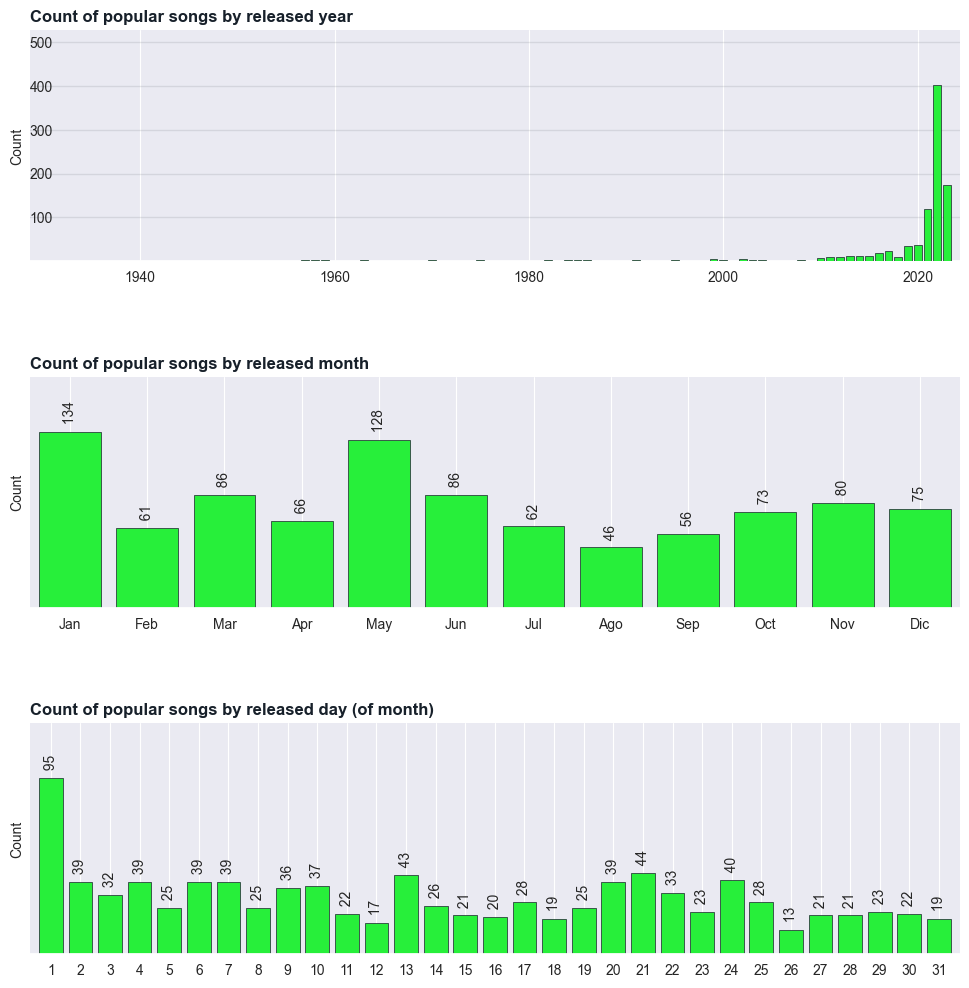

In [3]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

fig, ax = plt.subplots(3, 1, figsize=(12, 12))

ax[0].bar(data.released_year.value_counts().index,
          data.released_year.value_counts(), color='#27EF3A',  
          edgecolor='#17202A', lw=0.5, zorder=10)
bars1 = ax[1].bar(months,
                  data.released_month.value_counts().sort_index(), color='#27EF3A', 
                  edgecolor='#17202A', lw=0.5)
bars2 = ax[2].bar(data.released_day.value_counts().sort_index().index, 
                  data.released_day.value_counts().sort_index(), color='#27EF3A',
                  edgecolor='#17202A', lw=0.5)

for axi in ax:
    axi.margins(x=0.01)
    axi.spines[['left', 'right', 'top']].set_visible(False)
    axi.spines['bottom'].set_lw(2)
    axi.set_ylim(0, 1.25*axi.get_ylim()[-1])
for i, bar in enumerate(bars1 + bars2):
    axi = ax[1] if i < len(bars1) else ax[2]
    x, y = bar.get_x() + bar.get_width()/2, bar.get_height()
    axi.text(s=f'  {y}', x=x, y=y, rotation=90, ha='center', va='bottom');
    
plt.setp(ax[1:], yticks=[])
ax[0].grid(color='#17202A', alpha=0.1, lw=1, axis='y')
ax[2].xaxis.set_major_locator(plt.MultipleLocator(1))

ax[0].yaxis.set_major_locator(plt.MultipleLocator(100))
ax[0].tick_params(axis='y', left=False, pad=-20)
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda yi, ri: f'{yi:.0f}' if yi>0 else ''))

ax[0].set_title('Count of popular songs by released year', loc='left', 
                fontweight='bold', color='#17202A')
ax[1].set_title('Count of popular songs by released month', loc='left', 
                fontweight='bold', color='#17202A')
ax[2].set_title('Count of popular songs by released day (of month)', loc='left', 
                fontweight='bold', color='#17202A')
plt.subplots_adjust(hspace=0.5)
plt.setp(ax, ylabel='Count')

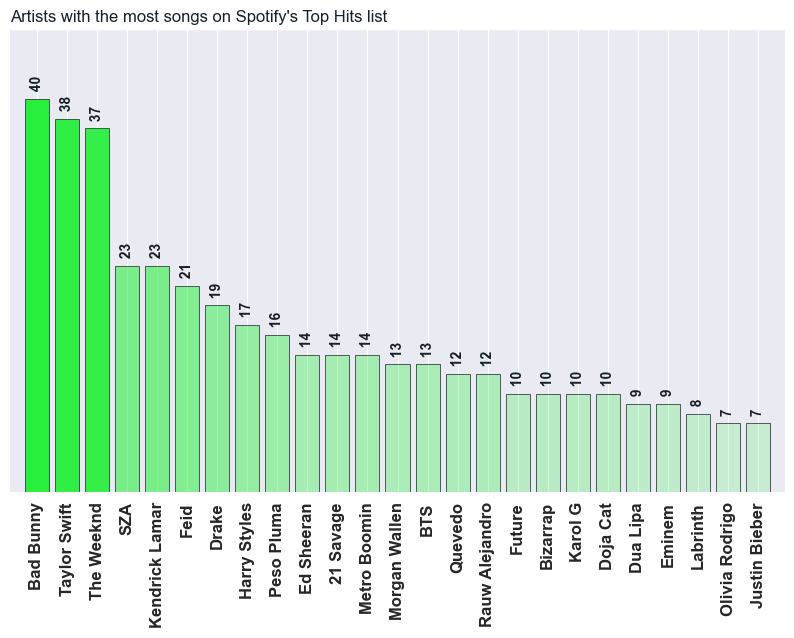

In [4]:
count_by_artist = count_by_artist = pd.Series(','.join(data['artist(s)_name']).split(',')).str.strip().value_counts().head(25)

fig, ax = plt.subplots(figsize=(10, 6))
ax.margins(x=0.02)

colors = [(.15, .94, .23, vi/count_by_artist.max()) 
          for vi in count_by_artist]
bars = ax.bar(count_by_artist.index, count_by_artist, 
              color=colors, edgecolor='#17202A', lw=0.5)
ax.tick_params(axis='x', rotation=90)
for label in ax.get_xticklabels():
    label.set(ha='right')
ax.spines[['right', 'left']].set_visible(False)
ax.spines['top'].set_alpha(0.25)
ax.set_yticks([])

for bar in bars:
    ax.annotate(
        f'  {bar.get_height():.0f}', 
        xy=(bar.get_x() + bar.get_width()/2, bar.get_height()), 
        color='#17202A', 
        va='bottom', ha='center', rotation=90, 
        fontweight='bold'
    )
ax.set_title('Artists with the most songs on Spotify\'s Top Hits list', loc='left', 
             color='#17202A')
ax.set_ylim(0, ax.get_ylim()[1]+5)
for label in ax.get_xticklabels():
    label.set(fontsize=12, fontweight='bold', ha='center')